# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [15]:
medical.shape

(1338, 8)

In [16]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

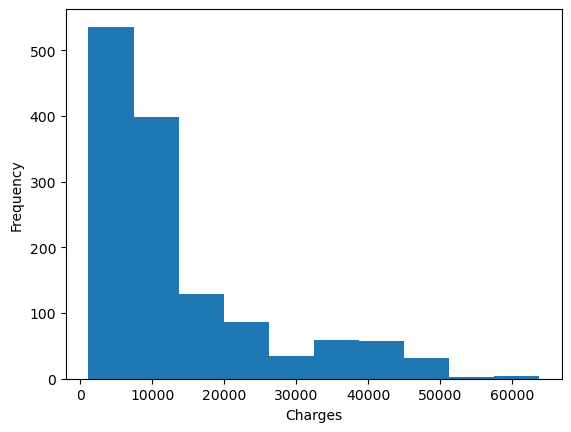

In [17]:
plt.hist(medical['charges'])
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [18]:
# mean and standard deviation
mean = np.mean(medical['charges'])
std_dev = np.std(medical['charges'])

print(f'Mean: {round(mean,3)}')
print(f'Standard deviation: {round(std_dev,3)}')

Mean: 13270.422
Standard deviation: 12105.485


If the data is approxmately normally distributed, then the mean and standard dev are appropriate measures of central limit theorem. However, if the data is highly skewed (has a long tail) or has outliers, then these statistics may not represent the data well.

Here we can see that the histogram shows a skewed spread and the sample data mean and standard deviation are not appropriate representations of normal tendency.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ To address the administrator's concern, we can use a sample t-test to determine if the true population mean charge is significantly different from 12000.

Using the Central Limit Theorem we can justify the t-test because the distribution of sample means approaches a normal distribution as the sample size increases. Since we have a smaple of the charges, we can calculate the sample mean and use a t-test to infer the population mean charge.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ We should use the one-sided confidence interval to address this concern.

In [19]:
# To calculate the crit value
# set the sig level
significance = 0.05

# crit value for 1-sided 95% confidence interval
df = len(medical['charges']) - 1
crit_val = t.ppf(1 - significance, df)

print(f'Critical value: {round(crit_val,4)}')

Critical value: 1.646


In [20]:
# To calculate the confidence interval
# standard error of mean
std_err_mean = std_dev / np.sqrt(len(medical['charges']))

# calc lower bound of the confidence interval
lower_bound = mean + crit_val * std_err_mean

print(f'One sided 95% confidence interval: {round(lower_bound,4)}')

One sided 95% confidence interval: 13815.1537


If the lower bound of the confidence interval is greater than or equal to 12000, we can conclude with 95% confidence that the true population mean charge is at least 12000 and the admin should not be concerned.

If it's less, we cannot rule out the possibility that the true population mean charge is less than 12000, and the admin should be concerned.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis for this test is that there is no significant difference in the mean charges between patients with insurance and patients without insurance. The alternative hypothesis is that there is a significant difference in the mean charges between the two groups.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [21]:
# Seperate the charges by insurance status

charges_insured = medical.loc[medical['insuranceclaim'] == 1, 'charges']
charges_uninsured = medical.loc[medical['insuranceclaim'] == 0, 'charges']

# calcute the sample means
mean_insured = np.mean(charges_insured)
mean_uninsured = np.mean(charges_uninsured)

# Calculate the sample standard deviation
std_insured = np.std(charges_insured, ddof = 1)
std_uninsured = np.std(charges_uninsured, ddof = 1)

# Cacl the sample sizes
n_insured = len(charges_insured)
n_uninsured = len(charges_uninsured)

In [22]:
# Calculate the pooled standard deviation
s_p = np.sqrt(((n_insured - 1) * std_insured ** 2 + (n_uninsured - 1) * std_uninsured ** 2) / (n_insured + n_uninsured - 2))

# Calculate the t-test statistic
t_stat = (mean_insured - mean_uninsured) / (s_p * np.sqrt(1/n_insured + 1/n_uninsured))

print('t-statistic:', t_stat)

t-statistic: 11.893299030876715


In [23]:
# Calculate the p-value
p_value = t.cdf(t_stat, df=n_insured+n_uninsured-2)

print('p-value:', p_value)

p-value: 1.0


In [26]:
from scipy.stats import ttest_ind

# Perform the t-test using SciPy
t_stat, p_value = ttest_ind(charges_insured, charges_uninsured)

print('t-statistic (SciPy):', t_stat)
print('p-value (SciPy):', p_value)

t-statistic (SciPy): 11.893299030876712
p-value (SciPy): 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ A z-test requires knowledge of the population standard deviation, while a t-test can be used with only the sample mean and standard deviation to estimate the population mean, particularly when the sample size is small or the population standard deviation is unknown

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test